# Complete Boston Housing Analysis: Regression



## Load Required Libraries

In [2]:
# Install packages if needed (uncomment if required)

library(mlbench)
library(ggplot2)
library(dplyr)
library(tidyr)
library(corrplot)
library(gridExtra)
library(scales)
library(psych)
library(car)
library(moments)
library(viridis)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.95 loaded


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘psych’


The following objects are masked from ‘package:scales’:

    alpha, rescale


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




## 1. Data Preparation for Regression

In [3]:
# Load required libraries
install.packages("caret", dependencies = TRUE)
library(car); library(lmtest); library(caret); library(pROC)
data("BostonHousing2", package = "mlbench")
boston <- BostonHousing2 %>% na.omit()
set.seed(123)
train_index <- createDataPartition(boston$medv, p = 0.8, list = FALSE)
train_data <- boston[train_index, ]; test_data <- boston[-train_index, ]
cat("Training:", nrow(train_data), "| Testing:", nrow(test_data), "\n")

Installing package into ‘/home/kushal/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)

also installing the dependencies ‘combinat’, ‘questionr’, ‘Cubist’, ‘klaR’, ‘pamr’, ‘spls’, ‘superpc’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: lattice

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Training: 407 | Testing: 99 


## 2. Multiple Linear Regression
### 2.1 Model Building

In [4]:
mlr_model <- lm(medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + b + lstat, data = train_data)
summary(mlr_model)


Call:
lm(formula = medv ~ crim + zn + indus + chas + nox + rm + age + 
    dis + rad + tax + ptratio + b + lstat, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9550  -2.7996  -0.4647   1.7767  25.0993 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.733617   5.619935   6.714 6.63e-11 ***
crim         -0.093857   0.039157  -2.397 0.016999 *  
zn            0.039436   0.015987   2.467 0.014062 *  
indus        -0.012988   0.069595  -0.187 0.852059    
chas1         2.290187   0.940621   2.435 0.015346 *  
nox         -17.130560   4.342272  -3.945 9.45e-05 ***
rm            3.499219   0.451445   7.751 7.87e-14 ***
age           0.009823   0.015510   0.633 0.526905    
dis          -1.390769   0.230614  -6.031 3.77e-09 ***
rad           0.330939   0.077135   4.290 2.25e-05 ***
tax          -0.012386   0.004342  -2.852 0.004568 ** 
ptratio      -0.960676   0.150307  -6.391 4.66e-10 ***
b             0.009841   0.00293

### 2.2 Multicollinearity Diagnostics (VIF)

        Variable   VIF   Status
tax          tax 9.660 MODERATE
rad          rad 8.153 MODERATE
nox          nox 4.448      LOW
dis          dis 4.065      LOW
indus      indus 3.956      LOW
age          age 3.214      LOW
lstat      lstat 3.132      LOW
zn            zn 2.323      LOW
rm            rm 1.912      LOW
ptratio  ptratio 1.852      LOW
crim        crim 1.845      LOW
b              b 1.365      LOW
chas        chas 1.067      LOW


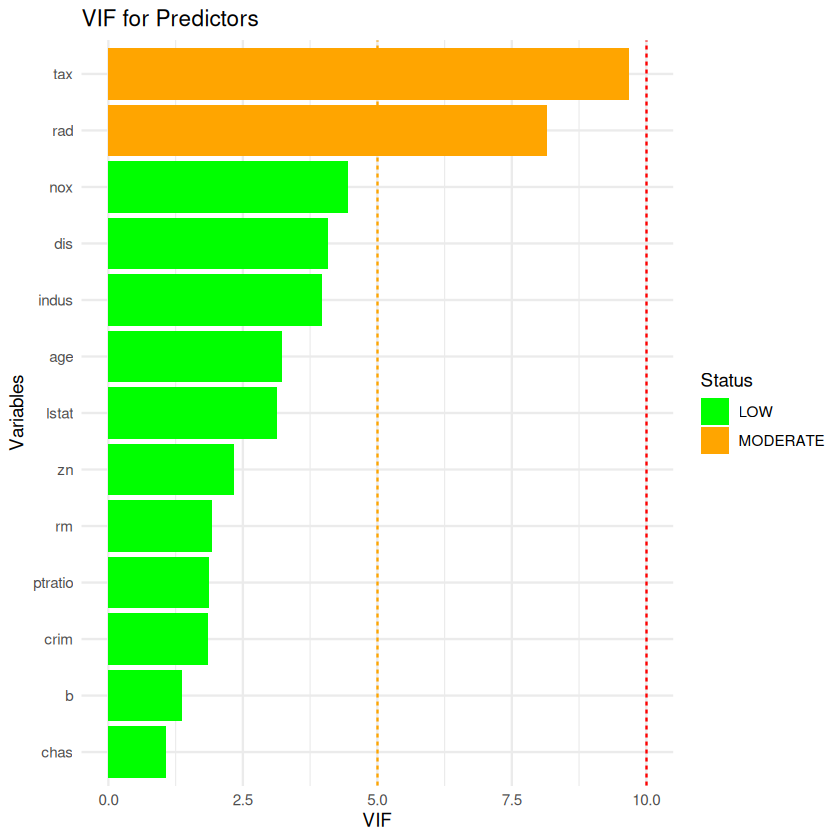

In [5]:
vif_values <- vif(mlr_model)
vif_df <- data.frame(Variable = names(vif_values), VIF = round(vif_values, 3),
                     Status = ifelse(vif_values > 10, "HIGH", ifelse(vif_values > 5, "MODERATE", "LOW")))
print(vif_df[order(-vif_df$VIF), ])
ggplot(vif_df, aes(x = reorder(Variable, VIF), y = VIF, fill = Status)) + geom_bar(stat = "identity") +
  geom_hline(yintercept = c(5, 10), linetype = "dashed", color = c("orange", "red")) + coord_flip() +
  scale_fill_manual(values = c("LOW" = "green", "MODERATE" = "orange", "HIGH" = "red")) +
  labs(title = "VIF for Predictors", x = "Variables", y = "VIF") + theme_minimal()

In [6]:
mlr_refined <- lm(medv ~ crim + zn + indus + chas + nox + rm + age + dis + ptratio + b + lstat, data = train_data)
cat("Refined Model VIF:\n"); print(round(vif(mlr_refined), 3))
summary(mlr_refined)

Refined Model VIF:
   crim      zn   indus    chas     nox      rm     age     dis ptratio       b 
  1.536   2.156   3.343   1.047   3.920   1.860   3.190   4.063   1.561   1.329 
  lstat 
  3.128 



Call:
lm(formula = medv ~ crim + zn + indus + chas + nox + rm + age + 
    dis + ptratio + b + lstat, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.0477  -2.6724  -0.6064   1.4995  26.9684 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.971143   5.409796   5.540 5.53e-08 ***
crim         -0.038908   0.036508  -1.066  0.28719    
zn            0.036400   0.015735   2.313  0.02122 *  
indus        -0.062337   0.065361  -0.954  0.34080    
chas1         2.672298   0.952059   2.807  0.00525 ** 
nox         -13.400451   4.165012  -3.217  0.00140 ** 
rm            3.816563   0.454979   8.388 8.83e-16 ***
age           0.004233   0.015787   0.268  0.78872    
dis          -1.408730   0.235548  -5.981 4.98e-09 ***
ptratio      -0.796281   0.140992  -5.648 3.11e-08 ***
b             0.008569   0.002959   2.896  0.00399 ** 
lstat        -0.555980   0.060425  -9.201  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 

### 2.3 Tests for Regression Coefficients

In [7]:
coef_summary <- summary(mlr_refined)$coefficients
coef_df <- data.frame(Variable = rownames(coef_summary), Estimate = round(coef_summary[,1], 4),
  Std_Error = round(coef_summary[,2], 4), t_value = round(coef_summary[,3], 3), p_value = format(coef_summary[,4], scientific = TRUE),
  Significance = ifelse(coef_summary[,4] < 0.001, "***", ifelse(coef_summary[,4] < 0.01, "**", ifelse(coef_summary[,4] < 0.05, "*", ""))))
print(coef_df)
conf_int <- confint(mlr_refined, level = 0.95); cat("\n95% CI:\n"); print(round(conf_int, 4))

               Variable Estimate Std_Error t_value      p_value Significance
(Intercept) (Intercept)  29.9711    5.4098   5.540 5.528276e-08          ***
crim               crim  -0.0389    0.0365  -1.066 2.871930e-01             
zn                   zn   0.0364    0.0157   2.313 2.121551e-02            *
indus             indus  -0.0623    0.0654  -0.954 3.407954e-01             
chas1             chas1   2.6723    0.9521   2.807 5.250492e-03           **
nox                 nox -13.4005    4.1650  -3.217 1.400333e-03           **
rm                   rm   3.8166    0.4550   8.388 8.833529e-16          ***
age                 age   0.0042    0.0158   0.268 7.887231e-01             
dis                 dis  -1.4087    0.2355  -5.981 4.979973e-09          ***
ptratio         ptratio  -0.7963    0.1410  -5.648 3.113450e-08          ***
b                     b   0.0086    0.0030   2.896 3.990768e-03           **
lstat             lstat  -0.5560    0.0604  -9.201 2.081220e-18          ***

In [8]:
f_stat <- summary(mlr_refined)$fstatistic; p_value <- pf(f_stat[1], f_stat[2], f_stat[3], lower.tail = FALSE)
cat("F-statistic:", f_stat[1], "| p-value:", format(p_value, scientific = TRUE), "\n")

F-statistic: 93.06074 | p-value: 2.166251e-102 


### 2.4 Regression Assumptions

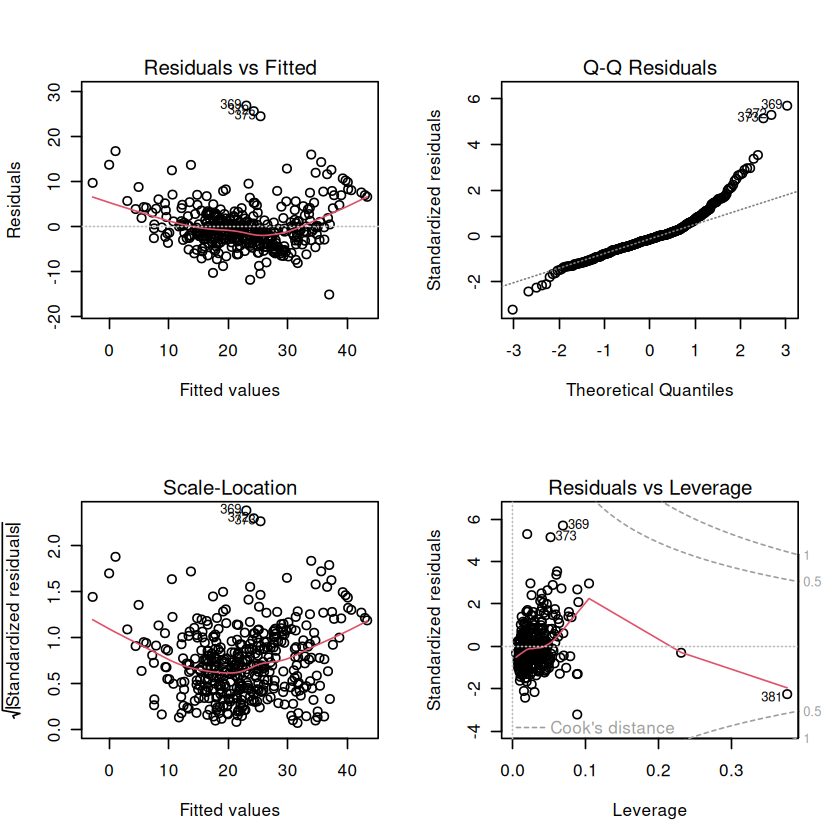

In [9]:
par(mfrow = c(2, 2)); plot(mlr_refined); par(mfrow = c(1, 1))

In [10]:
bp_test <- bptest(mlr_refined); print(bp_test)
cat("Interpretation:", ifelse(bp_test$p.value < 0.05, "Heteroscedasticity detected", "Homoscedasticity OK"), "\n")
dw_test <- durbinWatsonTest(mlr_refined); print(dw_test)


	studentized Breusch-Pagan test

data:  mlr_refined
BP = 48.159, df = 11, p-value = 1.337e-06

Interpretation: Heteroscedasticity detected 
 lag Autocorrelation D-W Statistic p-value
   1       0.4149478      1.149864       0
 Alternative hypothesis: rho != 0


### 2.5 Model Performance & Validation

In [11]:
train_pred <- predict(mlr_refined, train_data); test_pred <- predict(mlr_refined, test_data)
train_rmse <- sqrt(mean((train_data$medv - train_pred)^2)); test_rmse <- sqrt(mean((test_data$medv - test_pred)^2))
train_r2 <- summary(mlr_refined)$r.squared; test_r2 <- 1 - sum((test_data$medv - test_pred)^2) / sum((test_data$medv - mean(test_data$medv))^2)
cat("TRAINING: RMSE=", round(train_rmse,4), "| R²=", round(train_r2,4), "\n")
cat("TESTING:  RMSE=", round(test_rmse,4), "| R²=", round(test_r2,4), "\n")

TRAINING: RMSE= 4.8317 | R²= 0.7216 
TESTING:  RMSE= 4.6288 | R²= 0.7531 


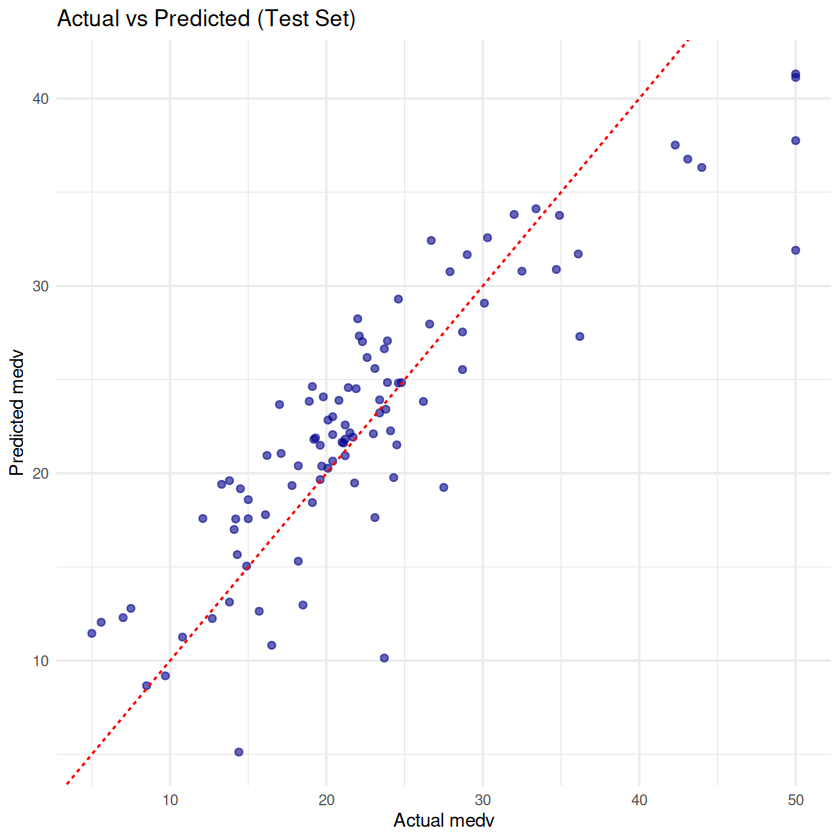

In [12]:
results_df <- data.frame(Actual = test_data$medv, Predicted = test_pred)
ggplot(results_df, aes(x = Actual, y = Predicted)) + geom_point(alpha = 0.6, color = "darkblue") +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(title = "Actual vs Predicted (Test Set)", x = "Actual medv", y = "Predicted medv") + theme_minimal()

## 4. Model Comparison & Insights

In [13]:
cat("LINEAR REGRESSION: R²=", round(test_r2,4), "| RMSE=", round(test_rmse,4), "\n")

LINEAR REGRESSION: R²= 0.7531 | RMSE= 4.6288 
